In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
class Bandit:
  def __init__(self):
    self.arm_set = np.random.normal(0,1,10)
    self.K = np.zeros(10)
    self.estimated = np.zeros(10)
    self.exploration = 0
    self.exploitation = 0
  
  
  def get_reward(self,action):
    noise = np.random.normal(0,1)
    reward = self.arm_set[action] + noise
    return reward

  def choose_eps_greedy(self,epsilon):
    n = np.random.random()
    #exploration
    if n<epsilon:
      self.exploration +=1
      return np.random.randint(10)
    else:
      self.exploitation +=1
      return np.argmax(self.estimated)

  def update(self,action,reward):
    self.K[action]+=1
    alpha = 1.0/self.K[action]
    self.estimated[action] +=alpha*(reward - self.estimated[action])

  def get_exploration_exploitation(self):
    return self.exploration,self.exploitation

  def get_estimated(self):
    return self.estimated

In [ ]:
def experiment(bandit,i,eps):
  history = []
  est = []
  for k in range(i):
    action = bandit.choose_eps_greedy(eps)
    R = bandit.get_reward(action)
    bandit.update(action,R)
    history.append(R)
  est = bandit.get_estimated()
  explr,explo = bandit.get_exploration_exploitation()
  return np.array(history),est,explr,explo

In [ ]:
# bandit = Bandit()
# history,estimated,exploration,exploitation = experiment(bandit,500,0.2)

In [ ]:
history = np.zeros(3000)
estimated = np.zeros(3000)
for i in range(500):
  bandit = Bandit()
  history,estimated,exploration,exploitation = experiment(bandit,3000,0.2)

history /= 500.0
estimated /= 500.0

In [ ]:
print("Number of exploration : ",exploration)
print("Number of exploitation : ",exploitation)

Number of exploration :  618
Number of exploitation :  2382


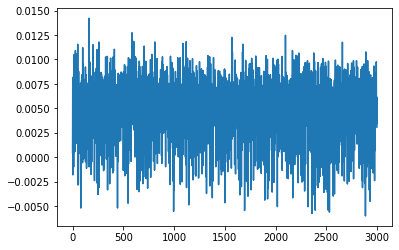

In [ ]:
plt.plot(history)

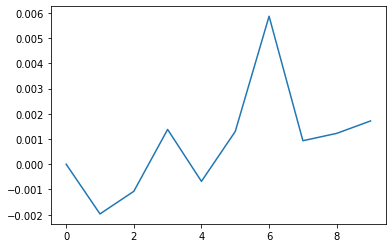

In [ ]:
plt.plot(estimated)

In [ ]:
eps = [0.1,0.3,0.6]
histories = []
estimates = []
for i in eps:
  bandit = Bandit()
  history,estimated,exploration,exploitation = experiment(bandit,500,i)
  histories.append(history)
  estimates.append(estimated)
  print(f"The number of exploration for epsilon {i} is : ",exploration)
  print(f"The number of exploitation for epsilon {i} is : ",exploitation)

The number of exploration for epsilon 0.1 is :  50
The number of exploitation for epsilon 0.1 is :  450
The number of exploration for epsilon 0.3 is :  155
The number of exploitation for epsilon 0.3 is :  345
The number of exploration for epsilon 0.6 is :  296
The number of exploitation for epsilon 0.6 is :  204


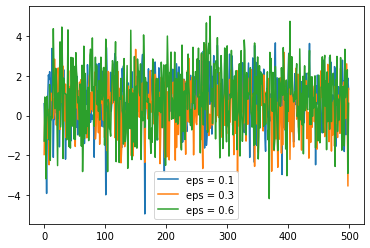

In [ ]:
plt.plot(histories[0],label="eps = 0.1")
plt.plot(histories[1],label="eps = 0.3")
plt.plot(histories[2],label="eps = 0.6")
plt.legend()
plt.show()

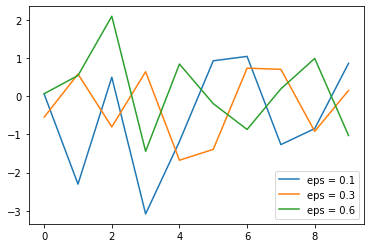

In [ ]:
plt.plot(estimates[0],label="eps = 0.1")
plt.plot(estimates[1],label="eps = 0.3")
plt.plot(estimates[2],label="eps = 0.6")
plt.legend()
plt.show()